# <div style="background-color:rgba(204, 229, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(0, 76, 153, 1);">PHYS 121 Lab #7</span></div>
# The Earth's Magnetic Field

***
## Learning Objectives:
* <b><span style="color:rgba(0, 153, 76, 1);"> Gain an understanding of the duality between magnetism and electricity as described by Ampère's law and Faraday's law.  </span></b>
* <b><span style="color:rgba(0, 153, 76, 1);"> In Lab 7, use this duality to measure the horizontal component of the local magnetic field using a basic solenoid and a compass. </span></b>

***
## Install & Import Required Packages:
Before starting, place your cursor in the code cell below and press 'Shift' + 'Enter'.  If the 'Check()' function reports that "All packages already installed", then proceed by first executing the second code cell that begins with: 
``` python
# Import the required modules.
```

If 'Check()' reports that some new packages have been installed, then go to File$\to$Log Out to complete log out of this notebook.  Then log in and execute the cell below again.

In [ ]:
import installer
installer.Check()

In [14]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import httpimport
import uncertainties 
from uncertainties import ufloat
from uncertainties.umath import * 
import ipysheet
with httpimport.remote_repo(['data_entry'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import data_entry
with httpimport.remote_repo(['PHYS121'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import PHYS121

***
## Introduction:

In 1820, the Danish physicist Hans Christian Ørsted observed that a compass needle would be deflected when the compass was placed near a current-carrying wire. This hinted towards a deep connection between electricity and magnetism, which would be vigourously investigated through the rest of the 19th century. Described mathematically by Maxwell in 1965 and verified experimentally by Hertz in the late 1880s and 90s, the theory of **electromagnetism** is the result of that work.

At this point, you may have learned in class about two important results in electromagnetism - **Faraday's law** and **Ampère's law**. Forgoing mathematical precision, the *intuitive* implications of these laws can be understood as follows:
* **Faraday's law**: a time-varying magnetic field passing through a closed conducting loop will generate an electric current
* **Ampère's law**: an electric current will generate a magnetic field, which forms a closed loop around the current

Among the *many* direct applications of these laws are
* **electrical generators**: mechanical energy (from combustion, movement of water over turbines, pressurized steam, etc.) is converted to electrical energy by rotating a conducting coil through a magnetic field, generating a current according to Faraday's law
* **microphones**: sound waves cause vibrations in a small magnetic diaphragm, generating a current in a nearby coil with the *same* frequency content as the sound waves
* **loudspeakers**: precisely the opposite of a microphone - a time-varying current through a loop creates a time-varying magnetic feild according to Ampère's law. This field causes a magnetized diaphragm to oscillate, which in turn vibrates the air, producing sound waves with the same frequency content as the electrical signal
* **magnetic resonance imaging (MRI)**: this requires strong magnetic fields, and the most common form of MRI machine used today creates these fields by passing electrical currents through liquid helium-cooled superconducting coils 

Today, you will be using an application of **Ampère's law** to measure the local magnetic field due to the earth. You will investigate **Faraday's law** next week.

<br>
<br>
<p>
<center>
<img src="solenoid.svg" alt="image info" style="width: 45%; height: auto;" /><br>
<b>Fig. 1: The magnetic field generated by a solenoid. Near the centre of the solenoid, the magnetic field lines essentially parallel to the axis of the solenoid, but begin to bend near the ends. </b></center>
</p>

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 1 - Measuring the Local Magnetic Field ()</span></div>

Recall that when the radius of the solenoid is much less than its length, the field in the middle of the coil is given approximately by the following:

\begin{align}
\vec{B}_{Sol} = \mu_0 n I
\label{eq:Bmag} \tag{1}
\end{align}

where $I$ is the electrical current in the coil, $n$ is the **turn density**, or the number of turns per unit length, and $ \mu_0 = 4\pi \times 10^{-7} $ H/m is a constant, called the **vacuum permeability**. 

In the pre-lab, you saw how it's possible to measure the local magnetic field using only a coil, a DC power source, and a compass. You should pause and reflect on the import of the results you obtained:

> **Using mathematics and well-known physical laws, you obtained an expression for a quantity of interest in terms of a small handful of easily measureable quantities.** 

As experimentalists, this is the kind of result we *love* to see. It suggests a clear course of action - to measure the magnetic field of the earth, we need only measure the angle between the compass needle and the axis of the solenoid as a function of the current $I$ in our solenoid (see Fig. 2 and its description).

<br>
<p>
<center>
<img src="btot.svg" style="width: 35%" />
<b>Fig. 2: The total magnetic field is given by superposition of the fixed local field $\vec{B}_{Loc}$ and the variable solenoid field $\vec{B}_{Sol}$. The direction of this total field (and thus the measured angle $\varphi$) can be changed by increasing the current through the solenoid, according to Eq. 1. </b></center>
</p>

***
**<span style="color:blue">Question 1.1:</span>**  

From Eq. 1, we see that the field in the solenoid depends on the turn density $n$, which will vary from solenoid to solenoid. Count the number of turns of your solenoid and measure its length in meters. Use the provided code cell below to assign your measurement values to the variables $N$ and $L$. Then, define the constant $n$ equal to $N$ divided by $L$ (note that Python is a *case-sensitive* programming language). 

***
**<span style="color:blue">Answer 1.1:</span>**

In [2]:
# This cell will be auto-graded, so be sure to use the exact variable names specified above!
N = 51
L = 0.2
n = N / L

***

Place the compass at the midpoint of you solenoid. Without any current passing through your solenoid, orient it on your table so that magnetic north is perpendicular to the axis of the solenoid. You should be careful to get this as *close* to $90^\circ$ as possible! Your expression from pre-lab will not hold if the angle between the axis and the local field varies significantly from $90^\circ$. It *is* possible to account for a large error mathematically if you measure the actual initial angle, and you're welcome to do so if you wish.

As indicated in the pre-lab, you will be measuring the angle $\varphi$ for a set of values of the current $I$. You found that by plotting $\tan\varphi$ as function of $I$ and performing a linear fit, the magnitude of the local field $\left|\left| \vec{B}_{Loc} \right| \right| \equiv B_{Loc}$ could be determined from the slope $m$.

So, place your compass at the midpoint of your solenoid. Using the provided phone, take pictures of the compass needle as you vary the current. You should take at least 15 photos to get a good dataset. For example, you could start with the DC supply turned off and then increment the current by 15 mA until you reach 225 mA. You may want to write the current on a piece of paper in view of the camera to help organize the results later. Once you've taken your photos, upload them to the computer. 

The following guide offers one possible method for measuring the angle. However, you are welcome to use your own method if you come up with one (and we're all ears if you have a good idea!)

### Setting up excel for measurements 
<br>
First, import the zero-current image.
<br>
<br>

***
![SegmentLocal](Gifs/gif1.gif "segment")

***
<br>
Next, draw a line to mark the axis of the solenoid. For accuracy, use a fixed reference on the apparatus rather than the east-west markers.
<br>
<br>

***

![SegmentLocal](Gifs/gif2.gif "segment")

***
<br>
The next line will mark the north-south direction.
<br>
<br>

***

![SegmentLocal](Gifs/gif3.gif "segment")

***
<br>
Since you'll need to place the centre of the compass from your other images at the "crosshairs" you've made, draw a circle around the compass to help with positioning.
<br>
<br>

***

![SegmentLocal](Gifs/gif4.gif "segment")

***
<br>
Finally, place your protractor on the worksheet.
<br>
<br>

***

![SegmentLocal](Gifs/gif5.gif "segment")

***

### Taking measurements
<br>
Import your image and crop as desired. Take care to align the image as well as you can.
<br>
<br>

***

![SegmentLocal](Gifs/gif6.gif "segment")

***
<br>
Draw another line- you'll use this to measure the angle.
<br>
<br>

***

![SegmentLocal](Gifs/gif7.gif "segment")

***
<br>
The rest of the measurements should go fairly quickly, now! Keep the line from the last step and import your images one at a time, recording the angle and current for each.
<br>
<br>

***

![SegmentLocal](Gifs/gif8.gif "segment")

***

Use the code cell below to import your data. You may wish to manipulate the data in Python or Excel, and you may import the data however you wish. **Appendix A** describes the Spreadsheet function if you choose to use that method.
<br>
<br>
No matter what you choose to do, by the end of the cell, you should have defined two arrays: one for $I$ and one for the corresponding values of $\tan\varphi$. **The tangent function in both Excel and Python assumes that $\varphi$ is in radians.**

In [26]:
# Upload your data here
I = [0, 0.01, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.15]
angle = [90,101,114,122,128,136,139,143,145,148,152,156]
tphi = np.tan(np.radians([a-90 for a in angle]))

print(I)
print(tphi)

[0, 0.01, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.15]
[0.         0.19438031 0.44522869 0.62486935 0.78128563 1.03553031
 1.15036841 1.32704482 1.42814801 1.60033453 1.88072647 2.24603677]


Use the cell below to perform a linear fit of $\tan\varphi$ as a function of $I$. Refer to **Appendix B** at the end of this notebook for the syntax of an unweighted linear fit.

$y = m\,x + b$

This is an **UNWEIGHTED** fit.

,,Value
slope,$m =$,15.31+/-0.35
$y$-intercept,$b =$,0.039+/-0.028


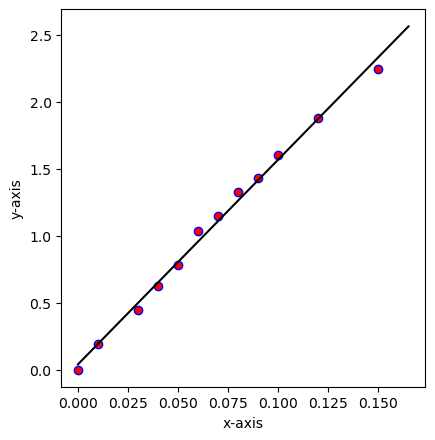

In [27]:
# Perform your unweighted linear fit here, using the vectors you defined in the previous cell.
m, b, dm, db, fig = PHYS121.LinearFit(I, tphi)

Finally, calculate $B_{Loc}$ using the slope from above. The following cell will guide you through the calculation with popagation of error. You may copy and paste your code from the pre-lab, but make sure that you change the variables as needed.  You may assume that the uncertainty in $n$ is negligible. 

In [43]:
# Package the slope value and uncertainty into a "ufloat" object for propagation of error. 
# If you chose different variable names for the slope and its uncertainty in your linear fit, 
# substitute them for m and dm. 
m_unc = ufloat(m, dm)

# Refer to the function you derived in Question 1.3 to calculate B_Loc. The uncertainties will be calculated
# automatically if you use the m_unc variable for your slope.
B_Loc = n*(4*np.pi*(10**(-7)))/m_unc
print(B_Loc)

(2.09+/-0.05)e-05


***
**<span style="color:blue">Question 1.2:</span>**  

Report your result, including units. To write a $\pm$ symbol, write \\$\pm\\$.

***
**<span style="color:blue">Answer 1.2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

$B_{Loc} = 20.9 \pm 0.5 \mu T$
***

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 2 - Magnetic Inclination ()</span></div>

But wait... this all assumes that the magnetic field is completely parallel to the surface of the earth! The real field turns out to be somewhat more complex. The angle between the *actual* direction of the field and the surface of the earth is called the **magnetic inclination** (or **magnetic dip**). The magnetic inclination varies from location to location, as Fig. 3 demonstrates.

<p>
<center>
<img src="magincl.svg" alt="image info" style="width: 100%; height: auto;" /><br>
<b>Fig. 3: Magnetic inclination at different points of the earth's surface. Source: http://www.ngdc.noaa.gov/geomag/WMM/image.shtml (Public domain)</b></center>
</p>

So the quantity we measured in Part 1 is actually the *parallel* component of the local field, which we may denote as $B_{\parallel}$. The total local magnetic field would be given by

$$ B_{Earth} = \sqrt{B_{\parallel}^2 + B_{\perp}^2} $$

where $B_{\perp}$ is the vertical component of the local magnetic field.

***
**<span style="color:blue">Question 2.1:</span>**  

Go to https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml and find the *local* magnetic inclination and total field strength and the associated uncertainties. Report these values using the code cell below.

***
**<span style="color:blue">Answer 2.1:</span>**

In [49]:
# The first argument of a ufloat is the value, and the second argument is the uncertainty
B_Earth = ufloat( 54.46E-6 , 0.15E-6 )
incl = ufloat( 71.23 , 0.22 )

***
**<span style="color:blue">Question 2.2:</span>**  

Using the code cell below, calculate the magnetic inclination using the measured value of $B_\parallel$ and the found value of $B_{Earth}$. Use the function acos() from the uncertainties package. Convert your answer to degrees.

***
**<span style="color:blue">Answer 2.2:</span>**

In [50]:
incl_meas = (acos(B_Loc / B_Earth))*(180/np.pi)

print(incl_meas)

67.4+/-0.5


***
**<span style="color:blue">Question 2.3:</span>**  

Compare this value to the one you found online. Are they equal within the margin of error? Comment on the relative values and speculate about possible sources of discrepancies. 

***
**<span style="color:blue">Answer 2.3:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 3 - Inhomogeneity of the Solenoid Field ()</span></div>

Equation 1 gives an excellent approximation of the magnetic field at the centre of a finite solenoid. But what about the field at different points along the axis? Using the a ruler and the same method you used in Part 1, measure the angle between the compass needle and the axis of the solenoid with a fixed current $I$ for at least 9 different positions $r$ along the length of the solenoid, including the endpoints and the midpoint. Define $r$ so that the endpoints are at $r = 0, L$ and the midpoint is at $r = L/2$.

Use the following code block to create a spreadsheet to upload your measurements of $\varphi$ at different positions $r$
***

***
In pre-lab question 2, you found an expression for $B_{Loc}$ in terms of $\varphi$ and $B_{Sol}$. Let $B_{Sol} \equiv B_{Sol}(r)$ be a function of the position along the solenoid's axis. In this case, the angle $\varphi$ should *also* be a function of position.

***

***
**<span style="color:blue">Question 3.1:</span>**  

Define 

$$ B_0 \equiv B(L/2) \approx \mu_0 n I$$ 

and let $\varphi_0$ be the compass angle at this position and current. We're interested in how the field *deviates* from this value as we move away from the midpoint of the axis. 

Suppose you measure an angle $\varphi$ at position $r$. Use your expression from Pre-lab Question 2 to derive an expression for $B(r)$ as a function of $\varphi, B_0,$ and $\varphi_0$. (*Hint*: write two equtions, one with $B(r)$ and $\varphi$ and one with $B_0$ and $\varphi_0$, and then divide your equations). 

***
**<span style="color:blue">Answer 3.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

Use this expression and the following code-block to calculate the values of $B(r)$ from your measurements. Follow this closely, filling in the blanks and replacing variable names where necessary.

In [1]:
B_0 =       # Using Eq. 1 (or your results from Part 2), find the magnetic field at r = L/2
phi_0 =     # Report the deflection at r = L/2

# This line will involve the array of angles you defined in the previous code block, so the resulting
# object will also be an array.
B_r = 

# Replace "Bunits" and "Runits" with the appropriate choice of units for the field and the position, and replace
# "rArray" with the variable you assigned to the array of positions in the previous code block
[ print(f"B({rArray[i]} Runits) = {B_r[i]} Bunits")  for i in range(len(B_r))]

SyntaxError: invalid syntax (1995956100.py, line 1)

***
Now, generate a scatter plot showing your values of $B(r)$. Refer to **Appendix C** if you need a refresher on how to use this function.
***

In [ ]:
# Use this code block to generate your scatter plot


***
**<span style="color:blue">Question 3.1:</span>**  

Comment on your results. In particular, discuss *qualitatively* the field strength at the endpoints relative to the field strength at the midpoint. Do these results make intuitive sense to you? Why or why not? There are many ways to answer this question - think critically and don't worry about being exactly correct! 

***
**<span style="color:blue">Answer 3.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 
***

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 4 - Reflection & statement of contributions (25 minutes)</span></div>

Question 4.1 is used to reflect on the learning objectives stated at beginning of the notebook. 
***
**<span style="color:blue">Question 4.1:</span>**  

Comment on how the relationship between electricity and magnetism was used to measure the local magnetic field. Consider, in particular, the *measurability* of different quantities. 

***
**<span style="color:blue">Answer 4.1:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***

Question 4.2 is very open-ended. Don't worry about being exactly correct - think creatively and give it your best shot. If you have time, you may want to talk with neighbouring groups. If you do collaborate with others, mention their names in your answer.

***
**<span style="color:blue">Question 4.2:</span>**  

Today, you measured the *horizontal* component of the local magnetic field. If you wanted to measure the *vertical* component of the field, what might you do? What kind of equipment would you use?

***
**<span style="color:blue">Answer 4.2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
Below, you will briefly summarize the contributions that you and your partner made when completely this lab.  Please ensure that both partners have a chance to engage in all types of lab activities (developing the experimental methods/data collection strategies, hands-on interaction with the apparatus/data collection, and data processing/analysis in the Jupyter notebook).  Note that statements of contributions are common in science.  The figure below shows one example taken from a 2021 paper published in the journal *Nature Physics*.

<p>
<center>
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab1/images/contributions.jpg" alt="image info" style="width: 60%; height: auto;" /><br>
<b>Fig. 4: A sample statement of author contributions from a recent journal article.</b></center>
</p>

***
**<span style="color:blue">Question 4.3(a):</span>**  

Answer this question only if you worked with a partner to complete this lab.

In two or three sentences describe the specific contributions of **Partner A** to this lab.  For example, worked with the experimental apparatus to collect data for Part 1 of the lab, entered and processed the data in the Jupyter notebook for Part 2 of the lab, ...  

***
**<span style="color:blue">Answer 4.3(a):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  Please start be entering the name and student number of **Partner A**.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
**<span style="color:blue">Question 4.3(b):</span>**  

Answer this question only if you worked with a partner to complete this lab.

In two or three sentences describe the specific contributions of **Partner B** to this lab.  

***
**<span style="color:blue">Answer 4.3(b):</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  Please start be entering the name and student number of **Partner B**.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

***
**<span style="color:blue">Question 4.4:</span>**  

We welcome your feedback on the PHYS 121 labs!  Please feel free to include any comments you have about this lab in the cell below.  Your comments will be taken into consideration when revising/improving the PHYS 121 labs.  You can suggest improvements, point out anything that was unclear, comment on the strengths and weaknesses of the lab, ...

This question is optional and will have no impact on your lab grade.

***
**<span style="color:blue">Answer 4.4:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  

Double click this cell and enter your text here.  When done, hit 'Shift' + 'Enter' to execute the cell.  You may delete this text when entering your answer. 

# <div style="background-color:rgba(255, 204, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(102, 0, 204, 1);">Part 5 - Playground (optional)</span></div>

Feel free to add as many cells as you like below and use them as a playground for further independent investigations.  These cells won't be graded, so feel free to use them in any way that you like.  

In [ ]:
# Here's an empty code cell that you can use.  

In [ ]:
# Here's another empty code cell that you can use.

In [ ]:
# Here's yet another empty code cell that you can use.  
# If you need more, you can add cells using the '+' icon in the menu bar at to the top of the screen.

### <div style="background-color:rgba(255, 255, 102, 0.5); text-align:left; padding:20px 0; margin-top:20px">$\quad$Appendix A &ndash; The Spreadsheet Function...</div>

The function for generating spreadsheets that can be used for data entry or importing data from a csv (**c**omma-**s**eparated **v**alues) file is called as follows:
```python
PHYS121.Spreadsheet('csv_name')
```
There is only a single required input which represents the name of csv file.  If the csv file exists and is located in the same directory as your working Jupyter notebook (.ipynb file), then the data contained in the file will be used to populate the spreadsheet that opens.  If the csv file doesn't exist, then an empty spreadsheet will be opened.  In addition, the file 'csv_name.csv' will be created and it will contain whatever data you enter into the spreadsheet.

Furthermore, for each column of data you enter into the spreadsheet, a vector representing a list of values from that column will be created.  For example, if you have a column with named 'position' in the spreadsheet, then a vector called 'v_position' that contains all of the data from that column will be created.  This vector can then be used in other operations such as calculations or plotting.  

Our implementation of spreadsheets in Jupyter is based entirely off of a 'data_entry.py' function that was written by Dr. Carl Michal (https://phas.ubc.ca/~michal/). If you're interested in additional details, the source code for 'data_entry.py' can be found here: https://phas.ubc.ca/~michal/data_entry.py.
***

### <div style="background-color:rgba(255, 255, 102, 0.5); text-align:left; padding:20px 0; margin-top:20px">$\quad$Appendix B &ndash; The LinearFit Function...</div>

The linear-fit function is called as follows:
```python
LinearFit(xData, yData, yErrors = [], xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '', fill = False)
```
The xData and yData lists are required.  The others are optional with default values set.  The function returns the following outputs:
```python
Slope, Yintercept, errSlope, errYintercept, fig
```
The first four outputs are numerical values and 'fig' is the formatted plot. 

If $y$-uncertainities are provided, the function will perform a weighted fit.  The $y$-uncertainties list must be the same length as $x$- and $y$-data lists.  If $y$-uncertainties are not provided, the fit will be unweighted.  The other optional arguments include $x$- and $y$-axis names and units for the $x$- and $y$-datasets.  These must be entered as strings (enclosed in quotations) and they are used for formatting the outputs of the function.  If 'fill' is set to True, shading will be added around the best-fit line representing confindence intervals. 

### Unweighted Fit Example Implmentation
The code block below shows the most basic use of 'LinearFit' for an unweighted fit without any of the optional arguments.
```python
import PHYS121
V = [1, 2, 3, 4]
I = [0.12, 0.198, 0.285, 0.412]
m, b, dm, db, fig = PHYS121.LinearFit(V, I)
```

### Weighted Fit Example Implmentation
This second blcok of code shows how to use 'LinearFit' to do a weighted fit.  It also makes use of all of the other optional arguments.  
```python
import PHYS121
V = [1, 2, 3, 4]
I = [0.12, 0.198, 0.285, 0.412]
errI = [0.005, 0.012, 0.020, 0.025]
m, b, dm, db, fig = PHYS121.LinearFit(V, I, errI, 'voltage' , 'current', 'V', 'A', True)
```

The 'm, b, dm, db, fig = ...' syntax is used to store the function outputs in varibles.  If you're interested in details of the fitting process, see the following Python-based tutorial: https://cmps-people.ok.ubc.ca/jbobowsk/Python/html/Jupyter%20Weighted%20Linear%20Fit.html
***

### <div style="background-color:rgba(255, 255, 102, 0.5); text-align:left; padding:20px 0; margin-top:20px">$\quad$Appendix C &ndash; The Scatter Function...</div>

The function for generating scatter plots is called as follows:
```python
Scatter(xData, yData, yErrors = [], xlabel = 'x-axis', ylabel = 'y-axis', xUnits = '', yUnits = '', fill = False, show = True)
```
The 'xData' and 'yData' inputs are required, all other arguments are optional with default values set.  The function returns the a single output (the formatted plot):
```python
fig
```

The function will do a simple scatter plot if no 'yError' are included.  It will included error bars if 'yErrors' are passed to the function.  The 'fill' and 'show' arguments should generally be false.  

If the 'xData' list is empty, as in:
```python
xData = []
```
then the x-axis will be the trial number.  For example, is 'xData' is empty and 'yData' has 10 elements, the x-axis will span 1 to 10.

### Scatter Example Implmentation
The code block below shows an implementation of 'Scatter'.
```python
import PHYS121
theta = [10, 20, 30] # degrees
T = [2.02, 1.95, 2.13] # s
errT = [0.02, 0.02, 0.03] # s
fig = PHYS121.Scatter(theta, T, errT, 'initial angle' , 'period', 'degrees', 's')
```

If you're interested in generating your own plots with customized formatting, see the following Python-based plotting tutorial: https://cmps-people.ok.ubc.ca/jbobowsk/Python/html/Jupyter%20Basic%20Plots.html.
***